In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="zVTcvgXZEjc4ds2sz2eS")
project = rf.workspace("roboflow-universe-projects").project("construction-site-safety")
version = project.version(30)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 103.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Construction-Site-Safety-30 in yolov8:: 100%|██████████| 1446/1446 [00:00<00:00, 4884.18it/s]


In [2]:
!nvidia-smi

Tue Jan 13 13:23:54 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.4 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO

In [9]:
!yolo task=detect mode=predict model=yolov8l.pt conf=0.25 source='//content//Construction-Site-Safety-30//test//images//000005_jpg.rf.c613c066b79795d219855aca269760e6.jpg'


Ultralytics 8.3.253 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8l summary (fused): 112 layers, 43,668,288 parameters, 0 gradients, 165.2 GFLOPs

image 1/1 //content/Construction-Site-Safety-30/test/images/000005_jpg.rf.c613c066b79795d219855aca269760e6.jpg: 448x640 2 persons, 96.4ms
Speed: 4.0ms preprocess, 96.4ms inference, 39.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [11]:
!yolo task=detect mode=train model=yolov8l.pt data=//content//Construction-Site-Safety-30//data.yaml epochs=50 imgsz=640

Ultralytics 8.3.253 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=//content//Construction-Site-Safety-30//data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.

In [14]:
!pip install cvzone

  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26298 sha256=72abe042d6d6899e1af59d78b3b06f2849652efe06643c1eee2380a8b090072f
  Stored in directory: /root/.cache/pip/wheels/5d/21/e8/3147ae88d44e27f06e0175d337a7673c70fb957202cbbe2034
Successfully built cvzone


In [15]:
import cv2
import cvzone
import math

In [16]:
classNames = [
    "Excavator",
    "Gloves",
    "Hardhat",
    "Ladder",
    "Mask",
    "NO-Hardhat",
    "NO-Mask",
    "NO-Safety Vest",
    "Person",
    "SUV",
    "Safety Cone",
    "Safety Vest",
    "Bus",
    "Dump Truck",
    "Fire Hydrant",
    "Machinery",
    "Mini-van",
    "Sedan",
    "Semi",
    "Trailer",
    "Truck and Trailer",
    "Truck",
    "Van",
    "Vehicle",
    "Wheel Loader"
]



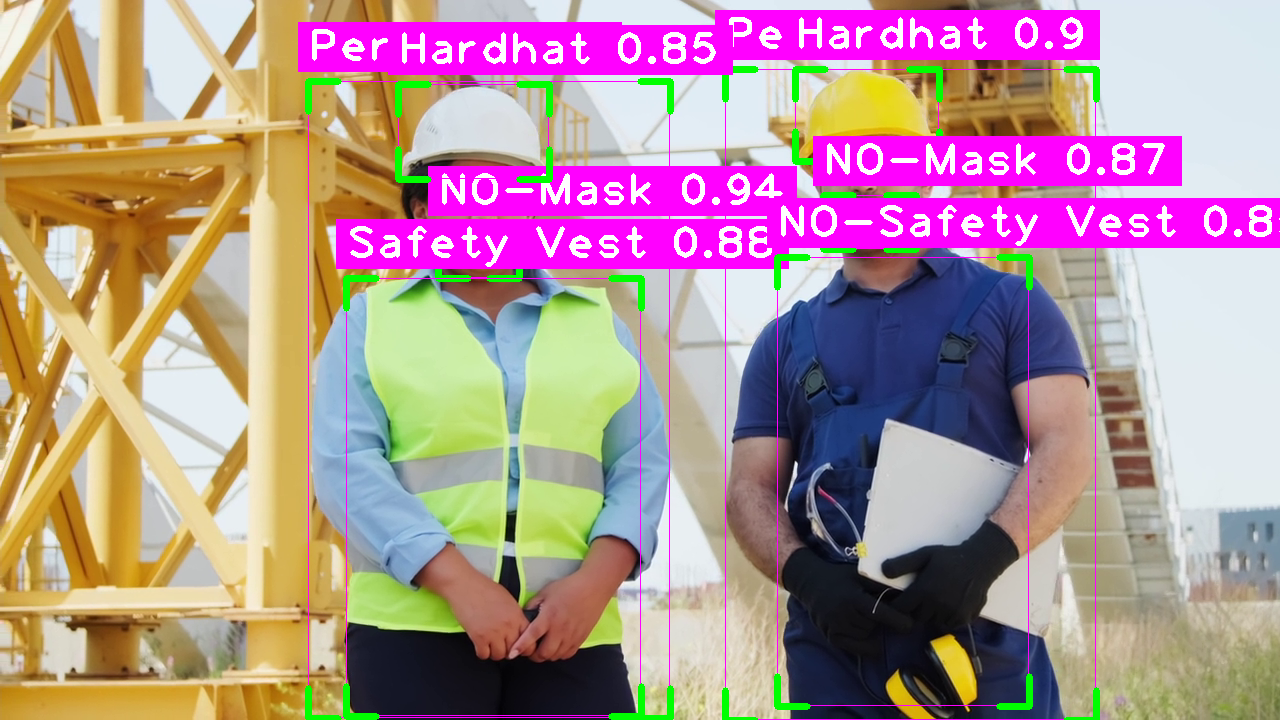

In [19]:
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
import time

cap1 = cv2.VideoCapture("/content/ppe-2-1.mp4")
model = YOLO('/content/runs/detect/train/weights/best.pt')

while True:
    success1, img1 = cap1.read()
    if not success1:
        break

    results = model(img1, stream=True)

    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            w, h = x2 - x1, y2 - y1
            cvzone.cornerRect(img1, (x1, y1, w, h))

            conf = round(float(box.conf[0]), 2)
            cls = int(box.cls[0])

            cvzone.putTextRect(
                img1,
                f'{classNames[cls]} {conf}',
                (max(0, x1), max(30, y1 - 20))
            )

    clear_output(wait=True)
    cv2_imshow(img1)

